# Homework 3: How similar is SARS-Cov-2 to other viruses?

Evolution is the process by which different living organisms are believed to have developed from earlier forms during the earth's history. The main component that evolves through time is the DNA which is passed on to the next generation. Genetic mutations, variation, and recombination are processes that modify DNA and cause variation in the population. The main drivers of evolution are natural selection and genetic drift that act on this variation. Through time, some characteristics become more common or rare in the population resulting in a change in heritable ones arising over successive generations.

Even though we do not consider viruses to be *living* organisms, they are still subject to evolution. Their genetic material undergoes the same transformations and selection, resulting in new variants and types of viruses.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Phylogenetic_tree.svg/800px-Phylogenetic_tree.svg.png" width="500">
</div>

Image source: [Wikipedia](https://en.wikipedia.org/wiki/File:Phylogenetic_tree.svg)

Comparing the characteristics of different organisms allows us to estimate their evolutionary distance. We use genetic material as a proxy for these characteristics. We estimate evolutionary distance as the number of transformation events that would occur for one organism to become genetically identical. In practice, this means aligning genetic sequences and observing the number of transformation events. Performing multiple sequence alignment and calculating pairwise distances gives us a distance matrix.

One way of presenting the evolutionary distance between organisms is with a phylogenetic tree. Similar organisms are connected via their common ancestor, even though we do not have genetic data to prove their existence. However, these common ancestors likely existed in the past due to evolution. The most common algorithms for building phylogenetic trees are the UPGMA and Neighbor-Joining algorithms. Many frequentist and Bayesian variations of these are also available online.

Once we know the evolution of the virus, we can expand our knowledge about similar viruses to our virus of interest. Our task is implementing the neighbor-joining method, a plotting function, and constructing a phylogenetic tree of coronaviruses. In the last problem, we will see how recombination can seemingly contradict the flow of evolution.

In [1]:
import numpy as np
import pandas as pd
from Bio import Entrez

In [2]:
# In order to import from the python file without hassle, we add the current
# directory to the python path
import sys; sys.path.append(".")

Let's let the nice folks at NCBI know who we are.

In [3]:
Entrez.email = "ls6727@student.uni-lj.si"

## Problem 1: Neighbor joining implementation

**Task:** Use the template `neighbor_joining` function in the file `helper_functions.py` and implement the neighbor-joining (NJ) algorithm for agglomerative phylogenetic clustering. Your implementation should return a `Node` object to construct a tree structure and return a root Node. Use provided classes and add code where needed. Stick to the provided structure and test your solution with added unit tests. Provided unit tests do not test the correctness of your implementation but only the structure of your output.

**Implementation requirement:** In theory, the neighbor-joining algorithm results in an unrooted tree. But for plotting and later rooting the tree, your implementation should return a root node. In the last iteration of the NJ, the algorithm joins the final two nodes by creating a root node and setting the distance to each of the remaining nodes as half of the distance between them.

(Optional) In problem 2, you will be implementing a plotting function for a phylogenetic tree. For easier visual comparison of the dendrograms, you can follow instructions in the function docstring to handle node additions and tie-breaks. Even if you handle tie-breaks differently, your implementation will be valid.

**[9 points]**

Answer the following questions about the neighbour joining algorithm:
- In some cases, the neighbour joining algorithm encounters ties in the Q-matrix when deciding which nodes to join. Can you think of an example where there are no ties (only one correct solution) when building a complete neighbour joining tree (at least 4 starting nodes)? If not, explain why.

Store your answers in the `algorithm_ties` variable.

**[1 points]**.

In [4]:
from helper_functions import neighbor_joining
from test_helper_functions import TestNeighborJoining

test = TestNeighborJoining()
test.test_neighbor_joining_node_api()
test.test_textbook_example()

In [5]:
algorithm_ties = """
Can you think of an example where there are no ties (only one correct solution) when building a complete neighbour joining tree (at least 4 starting nodes)?
If not, explain why.

Yes, an example with no ties is possible if the input distance matrix has unique values that lead to distinct Q-values. For instance, a distance matrix for nodes A, B, C, and D:

    D = [
        [0, 4, 6, 8],
        [4, 0, 6, 8],
        [6, 6, 0, 10],
        [8, 8, 10, 0]
    ]

This ensures a unique minimum Q-value at every step, avoiding ties. Ties occur only if the matrix has symmetrical or redundant distances.

"""

## Problem 2: Plotting a phylogenetic tree

**Task:**
Use the template `plot_nj_tree` function in the file `helper_functions.py` to write a plotting function using the `matplotlib` library.
The only limitation is to use the template function and two required inputs. How you position a dendrogram, colour the plot, labels and everything else is up to you.

Leaves in a dendrogram are connected via horizontal and vertical lines. Horizontal lines represent genetic distance, while vertical ones present divergence of the last common ancestor. Below is an example of a dendrogram. Leaves do not align on a vertical line as with hierarchical clustering.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Phylogenetic_tree_of_coronaviruses.jpg" width="500">
</div>

*(Patrick C. Y. Woo, Yi Huang, Susanna K. P. Lau, and Kwok-Yung Yuen, [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/deed.en) )*

Test your implementation to our provided unit tests by comparing your output plot to the ground truth in `tests/test_plotting_dendrogram.png`. Write your own tests as well.

**[10 points]**

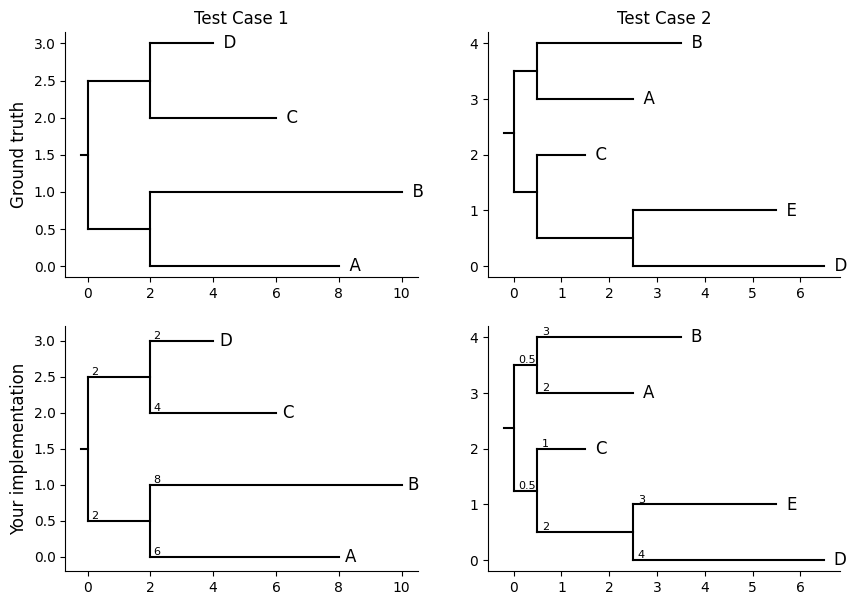

In [6]:
from helper_functions import plot_nj_tree
from test_helper_functions import TestPlottingDendrogram

test = TestPlottingDendrogram()
test.setUp()
test.test_plotting_dendrogram()

## Problem 3: Phylogenetic analysis of coronavirus

You obtained 31 aligned sequences of different coronaviruses collected at multiple time points worldwide. We used the Clustal algorithm to provide you with a multiple sequence alignment (MSA) file in `data/clustal_MSA_coronavirus.fasta`. Each entry has a form `name|accession`.

We will use Hamming distance to calculate genetic distance from pairwise sequence alignment. This naive approach estimates the distance by counting the number of mismatches in the alignment. For example, alignment *"ATC"* and *"ATT"* will have a distance of 1 while *"AT-C"* and *"CTTC"* will have a distance of 2. There are more sophisticated approaches to evolutionary distance estimation, but for our use case, Hamming distance will suffice.

Plot a phylogenetic tree of coronaviruses using your implementation of `neighbor_joining` and `plot_nj_tree`.
Compare your results to the ones found on [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus). Note that three additional viruses in our alignment file do not appear in the figure.

You might notice your figure differs from the one on Wikipedia. Neighbor-joining results in an unrooted or poorly rooted tree at best. Biologists developed a cleaver approach to determine the root of a neighbor-joining tree by including one distant relative species in the alignment, called the outgroup. In the course of evolution, a distance relative diverged first. We can determine the midpoint between the outgroup and the rest of the phylogenetic tree as a root. This approach proclaims the root node as the last common ancestor between all species in the tree. We will be using the *Breda virus* as an outgroup.

Order in a dendrogram can give an impression of a nicer plot. We can achieve this by setting the left child as the one with fewer leaf nodes in a subtree.

As a final step, fetch NCBI annotations to determine their coronavirus group. Present those groupings on your figure with colors.

**Task:** Plot the most informative phylogenetic tree by iteratively improving your implementation.

**a)** Calculate pairwise distances of aligned sequences using Hamming distance.
Construct and plot the phylogeny dendrogram using your implementations of neighbor-joining and plotting algorithm in `helper_functions`. **[4 points]**

**b)** Reroot the tree using the provided `reroot_tree` function in the `helper_function`. Use it to reroot a tree using the *Breda virus* as an outgroup. You have to fetch an outgroup from the tree first, and then use the reroot function. If you added any other relational parameters to your `Node` class, make sure you adjust the function. **[+1 points]**

**c)** Implement `sort_children_by_leaves` function in the `helper_function`. Use it to sort child nodes by assigning a left child to the one with fewer leaf nodes in their subtree. **[+1 points]**

**d)** Use color and labeling to show four major groups of coronaviruses. You can find the type of coronavirus in the NCBI annotations under the *taxonomy* field. **[+1 points]**

Save your final figure as `problem3.svg`. Make sure you save the figure using `plt.savefig('problem3.svg')` to ensure the correct format.

**[7 points in total]**

Then answer the following questions about the phylogenetic tree you have just drawn:
- To which group does SARS-CoV-2 belong? Answer using only the group name.
- Which of the following organisms would still be a valid outgroup in our case, and why?
  - Duck coronavirus 2714 (gamma coronavirus)
  - Betaarterivirus suid 1 (family Arteriviridae and order Nidovirales)
  - Homo sapiens
- Our phylogenetic tree comes without any measure of uncertainty. How would we improve our confidence in our phylogenetic relationships: would it be better to build a tree using a whole genome alignment or a consensus of several trees based on other gene alignments? Explain your reasoning.

Save your answers in the variables `sars_cov_2_group`, `valid_outgroup_choice` and `phylogenetic_uncertainty` respectively.

**[3 points]**

In [7]:
from Bio import SeqIO

name_map = dict()
accession_code_map = dict()
name_to_accession_map = dict()

for record in SeqIO.parse("data/clustal_MSA_coronavirus.fasta", "fasta"):
    name_map[record.name.split('|')[0]] = str(record.seq)
    accession_code_map[record.name.split('|')[1]] = record.name.split('|')[0]
    name_to_accession_map[record.name.split('|')[0]] = record.name.split('|')[1]

print(len(name_map.keys()), "sequences loaded")

31 sequences loaded


<Axes: >

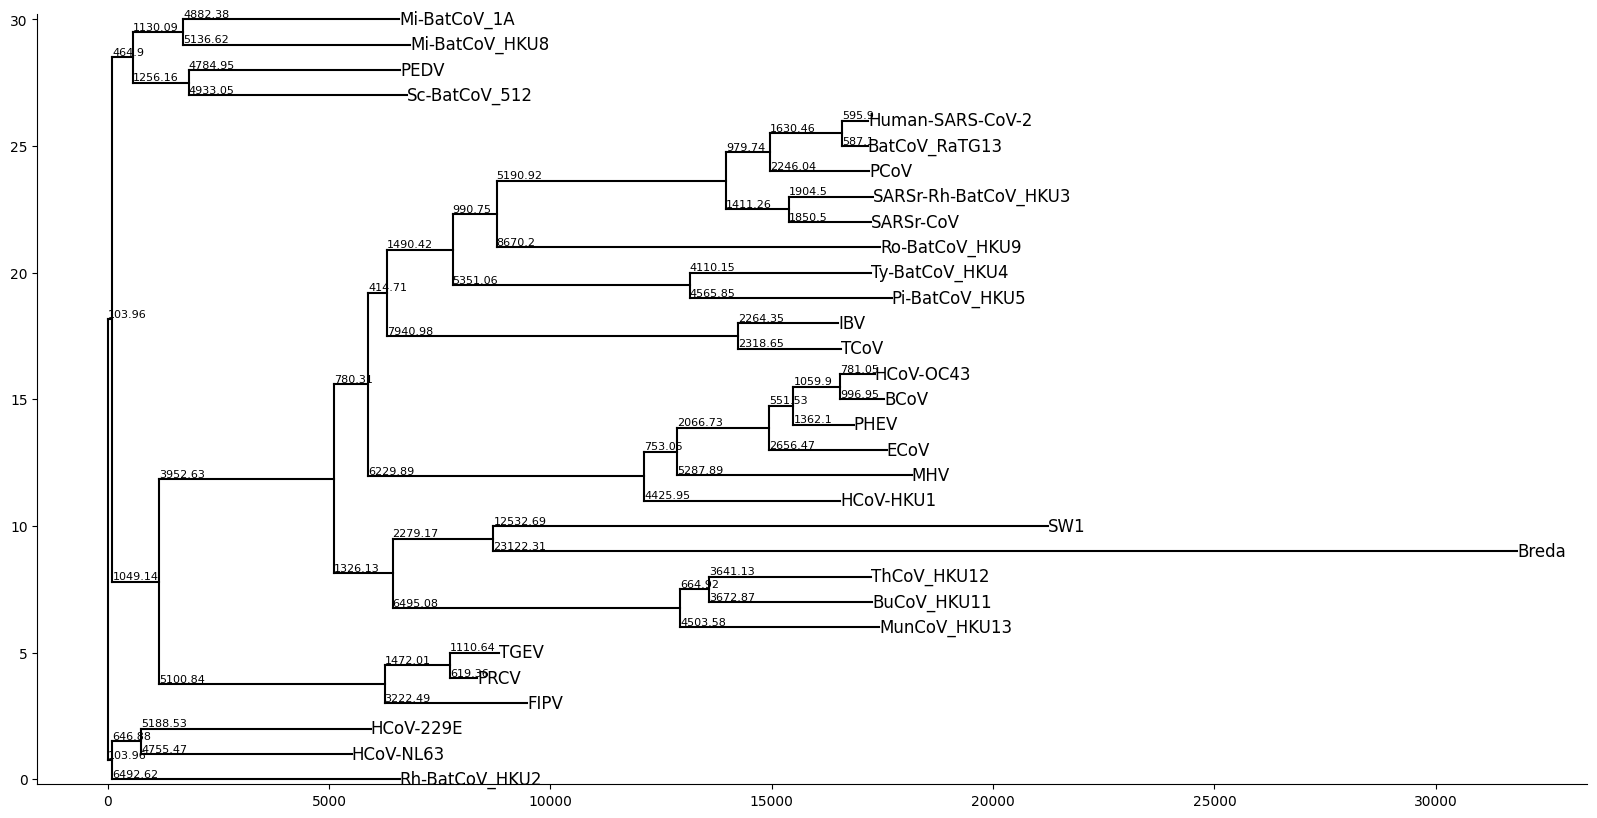

In [8]:
# Task a: Calculate the pairwise distances between the sequences. Construct and plot the phylogenetic tree using the neighbor joining algorithm.

import matplotlib.pyplot as plt

def hamming(seq1, seq2):
    return sum([1 for a, b in zip(seq1, seq2) if a != b])

distance_matrix = np.zeros((len(name_map), len(name_map)))
labels = list(name_map.keys())

for i, seq1 in enumerate(labels):
    for j, seq2 in enumerate(labels):
        if i == j:
            distance_matrix[i, j] = 0
        elif i > j:
            distance_matrix[i, j] = distance_matrix[j, i]
        else:
            distance_matrix[i, j] = hamming(name_map[seq1], name_map[seq2])

tree = neighbor_joining(distance_matrix, labels)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plot_nj_tree(tree, ax)

<Axes: >

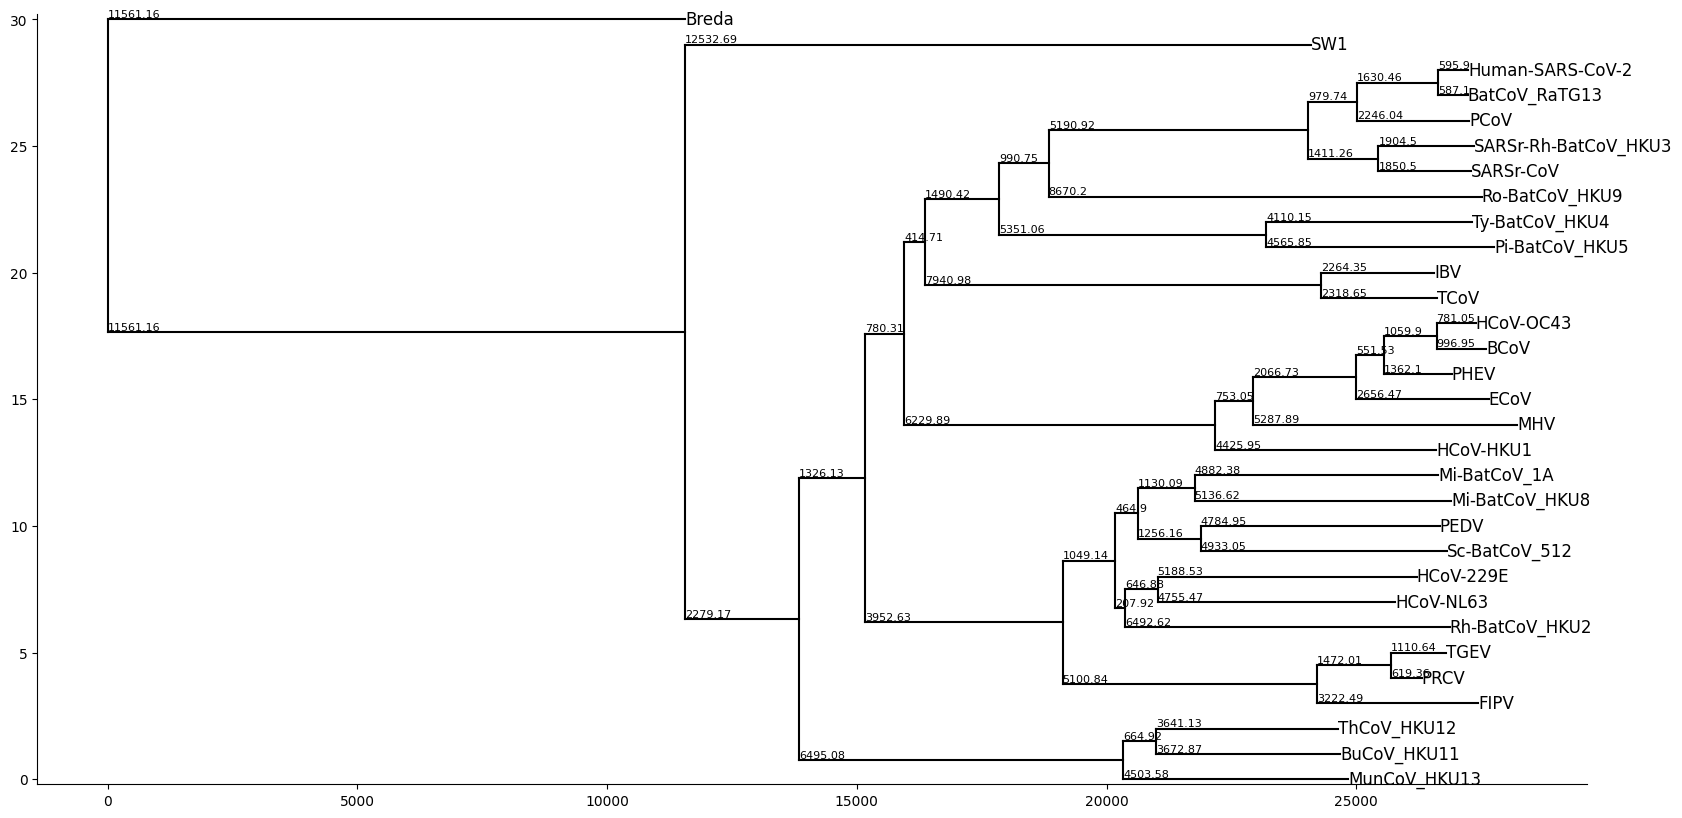

In [9]:
# Task b: Reroot the tree using the 'Breda' sequence as the outgroup. Plot the tree.
from helper_functions import neighbor_joining, plot_nj_tree, reroot_tree, Node

def find_node(node: Node, name: str) -> Node:
    """
    Find a node in the tree by its name.

    Parameters
    ----------
    node: Node
        The root node of the tree.
    name: str
        The name of the node to find.

    Returns
    -------
    Node
        The node with the given name, or None if not found.
    """
    if node is None:
        return None
    
    if node.name == name:
        return node
    
    left = find_node(node.left, name)
    if left is not None:
        return left
    
    right = find_node(node.right, name)
    if right is not None:
        return right
    
    return None

tree = neighbor_joining(distance_matrix, labels)
breda_node = find_node(tree, 'Breda')
tree = reroot_tree(tree, breda_node)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plot_nj_tree(tree, ax)

<Axes: >

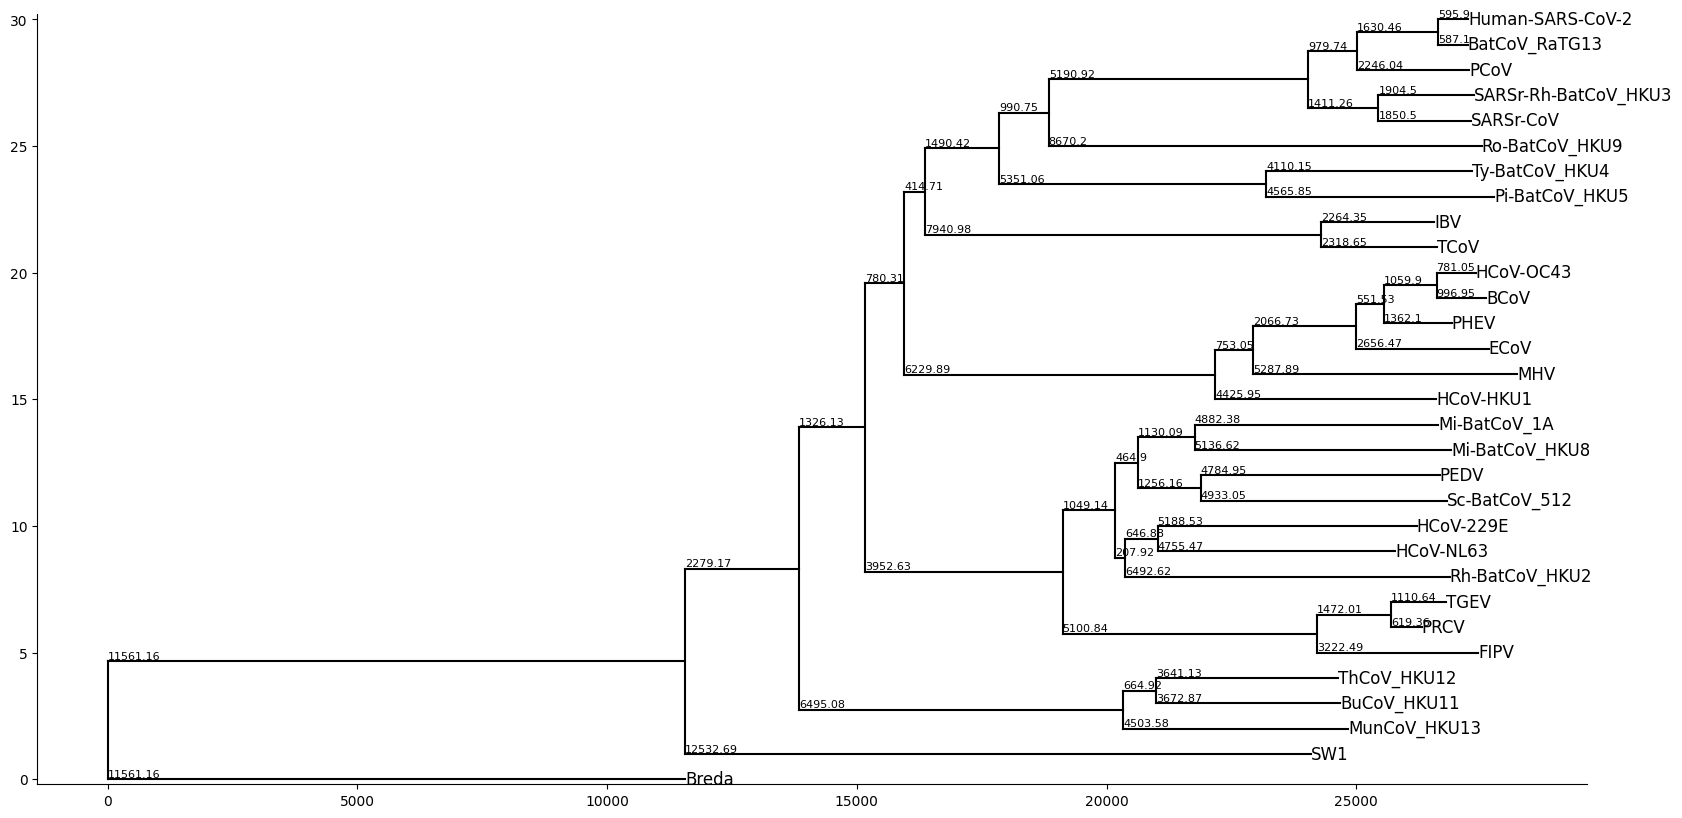

In [10]:
# Task c: Implement `sort_children_by_leaves` function. Use it to sort child nodes by assigning a left child to the one with fewer leaf nodes in their subtree.
from helper_functions import neighbor_joining, plot_nj_tree, reroot_tree, Node, sort_children_by_leaves

tree = neighbor_joining(distance_matrix, labels)
breda_node = find_node(tree, 'Breda')
tree = reroot_tree(tree, breda_node)
sort_children_by_leaves(tree)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plot_nj_tree(tree, ax)

In [11]:
# Task d: Use color and labeling to show four major groups of coronaviruses. You can find the type of coronavirus in the NCBI annotations under the *taxonomy* field.

taxonomy_map = dict()

for virus in accession_code_map.keys():
    handle = Entrez.efetch(db="nucleotide", id=virus, rettype="gbwithparts", retmode="text")
    record = SeqIO.read(handle, "genbank")
    taxonomy_map[virus] = None
    for type in record.annotations['taxonomy']:
        if type in {'Alphacoronavirus', 'Betacoronavirus', 'Gammacoronavirus', 'Deltacoronavirus'}:
            taxonomy_map[virus] = type
    handle.close()
    
print(len(set(taxonomy_map.values())), "taxonomy entries loaded")
print(set(taxonomy_map.values()))


5 taxonomy entries loaded
{'Gammacoronavirus', None, 'Deltacoronavirus', 'Alphacoronavirus', 'Betacoronavirus'}


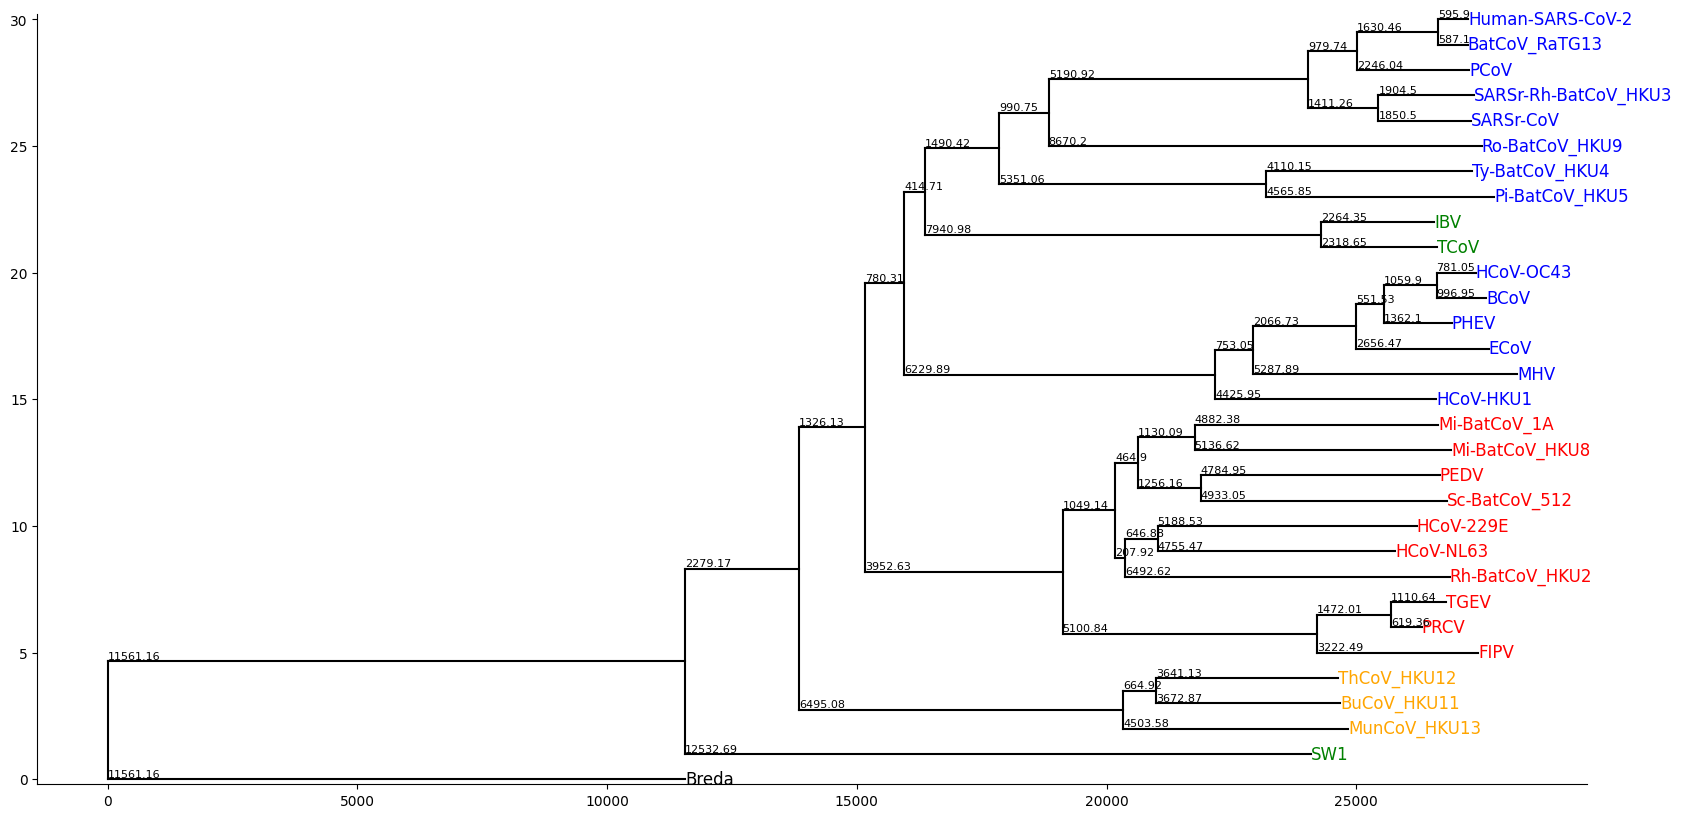

In [12]:
from helper_functions import neighbor_joining, plot_nj_tree, reroot_tree, Node, sort_children_by_leaves

taxonomy_color_map = {
    'Alphacoronavirus': 'red',
    'Betacoronavirus': 'blue',
    'Gammacoronavirus': 'green',
    'Deltacoronavirus': 'orange',
    None: 'black'
}

tree = neighbor_joining(distance_matrix, labels)
breda_node = find_node(tree, 'Breda')
tree = reroot_tree(tree, breda_node)
sort_children_by_leaves(tree)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plot_nj_tree(tree, ax, taxonomy_color_map=taxonomy_color_map, taxonomy_map=taxonomy_map, name_to_accession_map=name_to_accession_map)

plt.savefig('problem3.svg')

In [13]:
sars_cov_2_group = """Betacoronaviruses"""

In [14]:
valid_outgroup_choice = """The valid outgroup choice is "Betaarterivirus suid 1" because it is in the same order (Nidovirales) 
but belongs to a different family, making it phylogenetically distinct but still closely related enough."""

In [15]:
phylogenetic_uncertainty = """To improve confidence in phylogenetic relationships, it would be better to build a consensus of several trees based on other gene alignments as this
reduces the influence of biases from using a single gene."""

## Problem 4: Recombination

We tend to think of evolution as a hierarchical process: we have some common ancestor that split into several sub-species through a series of random mutations. However, nothing is that straightforward in biology. There have been well-documented cases of horizontal gene transfer in nature where organisms swap entire chunks of DNA with each other. In viruses, something similar can happen as well. When a cell is infected with multiple virions (potentially different strains of the same virus), a *recombination event* can occur. Recombination occurs during the DNA copying process when, for whatever reason, the copier swaps out the virus template midway with a different template. For instance, we could start copying virus A, and then midway, the copier will switch to virus B, effectively resulting in new virus DNA that has DNA from both viruses A and B.

During the start of the global pandemic, there was much confusion about the origins of SARS-CoV-2. We initially thought it came from bats. Then, at some point, people noticed that a critical piece of the spike protein -- the receptor binding domain (RBD) -- was more similar to the sequence of pangolin coronaviruses. This evidence points to recombination. Before the virus jumped to humans, there must have been some host infected with both the Bat RaTG13 coronavirus and the Pangolin coronavirus where this recombination happened.

In this problem, we will look at the spike protein, look at the receptor binding domain, and check this evidence for recombination ourselves.

**Task**:
Find the spike proteins of the three viruses and align the sequences with each other using your global alignment implementation from the previous homework. Since we're comparing the differences between the bat and pangolin coronaviruses to the human virus, we only need to compute two alignments: human to bat and human to pangolin. We will then compare the differences between the two alignments. Find the RBD of SARS-CoV-2  using the [NCBI graphical view of the SARS-CoV-2 genome](https://www.ncbi.nlm.nih.gov/projects/sviewer/?id=NC_045512&tracks=[key:sequence_track,name:Sequence,display_name:Sequence,id:STD649220238,annots:Sequence,ShowLabel:false,ColorGaps:false,shown:true,order:1][key:gene_model_track,name:Genes,display_name:Genes,id:STD3194982005,annots:Unnamed,Options:ShowAllButGenes,CDSProductFeats:true,NtRuler:true,AaRuler:true,HighlightMode:2,ShowLabel:true,shown:true,order:9]&v=1:29903&c=null&select=null&slim=0) and look at the aminoacid similarity inside and outside the RBD. Similarly to the original publication, we will use a sliding window approach to calculate the similarity between sequences. Calculate the average number of matching amino acids for each window location in the alignment and plot the resulting similarity sequence. A window size of 100 is a good starting point. Perform this sliding window approach for both alignments and plot both similarity sequences in a single figure. Which coronavirus is more similar to SARS-CoV-2 in the RBD, and which is more similar outside the RBD? Create a visualization similar to the one in Fig. 2a from [the original Nature paper](https://www.nature.com/articles/s41586-020-2169-0)
to compare the human-to-bat and the human-to-pangolin alignments.

Save your visualization to `recombination.svg`. Make sure you save the figure using `plt.savefig('recombination.svg')` to ensure the correct format.

**[7 points]**

Then answer the following questions about recombination:
- Which coronavirus is more similar to SARS-CoV-2 inside the RBD and which is more similar outside the RBD? How did you observe this from a plot?
- If the DNA template is swapped during replication, why are we observing amino acid sequence and not nucleotide sequence similarity?
- Looking at your visualisation, are there other regions in the spike gene (or elsewhere in the genome) that could be due to recombination? Could there be an alternative explanation for the differences in these regions?

Save your answers in the variables `recombination_inside_rbd`, `recombination_aminoacid_similarity` and `recombination_other_regions` respectively.

**[3 points]**

In [16]:
accession_codes = {
    "Human-SARS-CoV-2": "NC_045512",
    "Bat-CoV RaTG13": "MN996532",
    "Pangolin-CoV MP789": "MT121216",
}

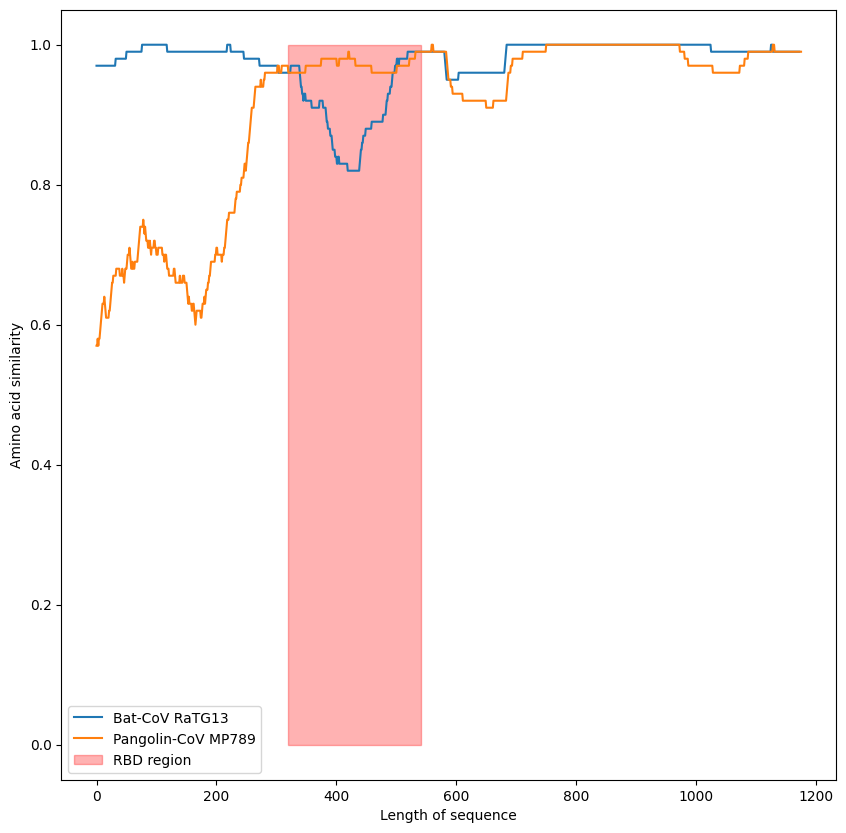

In [22]:
from Bio.Align import substitution_matrices
from helper_functions import global_alignment

spike_proteins_translation_map = dict()

for virus in accession_codes.keys():
    handle = Entrez.efetch(db='nucleotide', id=accession_codes[virus], rettype='gbwithparts', retmode='text')
    record = SeqIO.read(handle, 'genbank')
    handle.close()

    for feature in record.features:
        if feature.type == 'CDS' and 'gene' in feature.qualifiers and feature.qualifiers['gene'][0] == 'S':
            spike_proteins_translation_map[virus] = feature.qualifiers['translation'][0]

matrix = substitution_matrices.load("BLOSUM62")
blosum = dict()

for key in matrix.keys():
    if key[0] == '*' or key[1] == '*':
        formatted_key = (
            key[0] if key[0] != '*' else '-',
            key[1] if key[1] != '*' else '-'
        )

        blosum[formatted_key] = matrix[key[0]][key[1]]
    else:
        blosum[key] = matrix[key[0]][key[1]]

alignments = dict()
alignments['Bat-CoV RaTG13'] = global_alignment(spike_proteins_translation_map['Human-SARS-CoV-2'], spike_proteins_translation_map['Bat-CoV RaTG13'], lambda x, y: blosum[(x, y)])
alignments['Pangolin-CoV MP789'] = global_alignment(spike_proteins_translation_map['Human-SARS-CoV-2'], spike_proteins_translation_map['Pangolin-CoV MP789'], lambda x, y: blosum[(x, y)])

rbd_start = 319
rbd_end = 541
window_size = 100

def sliding_window(virus1: str, virus2: str, window_size: int) -> list:
    """
    Performs the sliding window comparison of two sequences, computing the average amino acid similarity in each window.

    Parameters
    ----------
    virus1: str
        The first virus sequence.
    virus2: str
        The second virus sequence.
    window_size: int
        The size of the sliding window.

    Returns
    -------
    list
        A list of average amino acid similarity scores for each window.
    """
    window_scores = []
    for i in range(0, len(virus1) - window_size):
        window1 = virus1[i:i + window_size]
        window2 = virus2[i:i + window_size]
        amino_acid_matches = 0
        for a, b in zip(window1, window2):
            if a == b:
                amino_acid_matches += 1
        window_scores.append(amino_acid_matches / window_size)
    return window_scores

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

window_scores = dict()
for alignment in alignments.keys():
    window_scores[alignment] = sliding_window(alignments[alignment][0], alignments[alignment][1], window_size)
    ax.plot(window_scores[alignment], label=alignment)

# Draw the RBD region
ax.add_patch(plt.Rectangle((rbd_start, 0), rbd_end - rbd_start, 1, color='red', alpha=0.3, label='RBD region'))

ax.set_xlabel('Length of sequence')
ax.set_ylabel('Amino acid similarity')
ax.legend()
plt.savefig('recombination.svg')
plt.show()


In [18]:
recombination_inside_rbd = """
Pangolin-Cov MP789 is more similar to SARS-CoV-2 inside the RBD, while Bat-CoV RaTG13 is more similar outside the RBD.
"""

In [19]:
recombination_aminoacid_similarity = """
The amino acid sequence similarity is observed because the genetic code is redundant, meaning that multiple codons can encode the same amino acid. 
This redundancy allows for silent mutations that do not change the amino acid sequence, even if the nucleotide sequence changes.
"""

In [20]:
recombination_other_regions = """
We can observe that in the parts of the spike protein before the RBD, Pangolin-CoV MP789 is a lot less similar to SARS-CoV-2 than Bat-CoV RaTG13. This is probably
because of the recombination event, as the Pangolin-CoV MP789 started to get copied at around the begining of the RBD. After the RBD region, both viruses posess
almost equal similarity to the SARS-CoV-2 virus.
"""

## Bonus 1: Bootstrap confidence

We performed an alignement, calulated pairwise distances and built a phylogenetic tree. Are we confident in our phylogenetic tree? The answer is, we don't know, because we never estimated the uncertainty of our solution.

In 1985, Joseph Felsenstein wrote an [article](https://pubmed.ncbi.nlm.nih.gov/28561359/) on estimating confidence limits of phylogenetic trees using a non-parametric bootstrap. It stands from the idea of creating bootstrap versions of alignment and building alternative phylogenetic trees. A confidence in a clade is then represented as a proportion of alternative trees that contain the same clade.

To generate a bootstrap version of alignment with length $N$, we sample $N$ alignment positions with replacement. Rearanging sequences accoring to a sequence of sampled indicies give us an alternative alignment. Based on new alignment we calculate the distance and apply neighbor joining algorithm to get an alternative tree.

Here we define a clade equivalence:
*Let $L$ be a set of leaf nodes in a clade from original tree and $L'$ be a set of leaf nodes in a clade from alternative tree. Let $L_1$ and $L_2$ be sets of leaf nodes of both children of a clade, such that $L = L_1 \bigcup L_2$. A clade of an alternative tree is considered the same if and only if $L = L'$ and ( $L_1 \bigcap L_1' = \emptyset\;\land\;L_2 \bigcap L_2'=\emptyset$ or $L_1 \bigcap L_2' = \emptyset\;\land\;L_2 \bigcap L_1'=\emptyset$ ).*

You are now given a Clustal mutliple sequence alignment of spike proteins from the same coronavirses as before. The alignment is store in `data/clustal_MSA_coronavirus_spike.fasta`. Again use Hamming distance for calculating distance and Breda virus as an outgroup.

**Task:** Construct a phylogenetic tree from spike protein MSA and use the bootstrap method for estimating confidence of each clade. Plot the phylogenetic tree and add confidence estimates on the plot.

**a)** Construct 100 alternative trees from bootstraped coronavirus alignments. Make sure you root your trees before estimating confidence.

**b)** Write a function to find a clade from the original tree in an alternative tree.

**c)** Calculate and asign confidence value of a clade to an attribute `Node.confidence`. Note that leaf nodes always have confidence 1.

**d)** Plot the phylogeny tree with confidence estimates using the same plotting function `plot_nj_tree` as in Problem 3. Do not plot confidence of leaf nodes.

Save your plot into `confidence_tree.svg`. Make sure you save the figure using `plt.savefig('confidence_tree.svg')` to ensure the correct format.

**[9 points]**

Then answer the following question:
- How does the phylogenetic tree compares to the one from Problem 3? Which part of the phylogenetic tree are we the least confident in?

Store your answers in the `bootstrap_comparison` variable.


**[1 points]**

In [21]:
bootstrap_comparison = """
How does the phylogenetic tree compares to the one from Problem 3? Which part of the phylogenetic tree are we the least confident in?
"""

## Bonus 2: Radial dendrogram

Use the template `plot_nj_tree_radial` function in the file `helper_functions.py` to write a plotting function for a radial dendrogram using the `matplotlib` library.

Pseudocode for radial dedrogram is provided in the [implementation article](https://kops.uni-konstanz.de/bitstream/handle/123456789/5941/bbs_dpt_05.pdf?sequence=1&isAllowed=y).

Plot the radial dedrogram for coronavirus spike protein MSA in the `data/clustal_MSA_coronavirus_spike.fasta` file.

Save your figure in `radial_dendrogram.svg`. Make sure you save the figure using `plt.savefig('radial_dendrogram.svg')` to ensure the correct format.

**[5 points]**